In [43]:
import numpy as np

scores = np.array([[-7., 13., 11.], [13., -7., 11.], [11., -7, 13.], [11., 13., -7.]])
print scores.shape
print scores
print

y = np.array([list(_).index(13) for _ in scores])
print y
for i, y_i in enumerate(y):
    print '[step 1]', "example =",i, "correct_class =", y_i
    scores_y = scores[i, y_i]
    print '[step 2]        {} - {} + 10  = {}'.format(scores[i], scores_y, scores[i] - scores_y + 10)
    margins = np.maximum(0, scores[i] - scores_y + 10)
    print "[step 3] max(0, {} - {} + 10) = {}".format(scores[i], scores_y, margins)
    margins[y_i] = 0.0
                                             
    print '[step 4] margins[y_i = {}] = 0.0               = {}'.format(y_i, margins)
    L_i = margins
    print '[step 5] L_i = sum(margins = {})   = {}'.format(L_i, np.sum(L_i))
    print
 
 

(4, 3)
[[ -7.  13.  11.]
 [ 13.  -7.  11.]
 [ 11.  -7.  13.]
 [ 11.  13.  -7.]]

[1 0 2 1]
[step 1] example = 0 correct_class = 1
[step 2]        [ -7.  13.  11.] - 13.0 + 10  = [-10.  10.   8.]
[step 3] max(0, [ -7.  13.  11.] - 13.0 + 10) = [  0.  10.   8.]
[step 4] margins[y_i = 1] = 0.0               = [ 0.  0.  8.]
[step 5] L_i = sum(margins = [ 0.  0.  8.])   = 8.0

[step 1] example = 1 correct_class = 0
[step 2]        [ 13.  -7.  11.] - 13.0 + 10  = [ 10. -10.   8.]
[step 3] max(0, [ 13.  -7.  11.] - 13.0 + 10) = [ 10.   0.   8.]
[step 4] margins[y_i = 0] = 0.0               = [ 0.  0.  8.]
[step 5] L_i = sum(margins = [ 0.  0.  8.])   = 8.0

[step 1] example = 2 correct_class = 2
[step 2]        [ 11.  -7.  13.] - 13.0 + 10  = [  8. -10.  10.]
[step 3] max(0, [ 11.  -7.  13.] - 13.0 + 10) = [  8.   0.  10.]
[step 4] margins[y_i = 2] = 0.0               = [ 8.  0.  0.]
[step 5] L_i = sum(margins = [ 8.  0.  0.])   = 8.0

[step 1] example = 3 correct_class = 1
[step 2]        [ 

In [118]:
import numpy as np

scores = np.array([[-7., 13., 11.], [13., -7., 11.], [11., -7, 13.], [11., 13., -7.]])
#print scores.shape
#print scores
#print
y = np.array([list(_).index(13) for _ in scores])



print "(step 1)"
print '\n                               '.join("                      scores = {}".format(scores).split('\n'))
#print '\n            '.join("        y = {}".format(y).split('\n'))
print '\n            '.join("scores[{}, {}] = {}".format( np.arange(y.shape[0]), y, scores[np.arange(y.shape[0]), y]).split('\n'))
print

print scores[np.arange(y.shape[0]), [y]].T

margin = scores - scores[np.arange(y.shape[0]), y].reshape((4,1))
margin = scores - scores[np.indices(y.shape), y].reshape((-1,1))

print '(step 2)\n{} - {}     \n=========='.format(scores, list(map(list, scores[np.indices(y.shape), y].T)), margin)
print


margin = margin + 10
print '(step 2)\n{} + 10\n=========='.format(margin - 10, margin)
print

#margin = scores - scores[np.arange(y.shape[0]), y].reshape((4,1)) + 10
#print '(step 2)\n{} - {} + 10\n==========\n{}'.format(scores, scores[np.arange(y.shape[0]), y], margin)
#print


print '(step 3) max(0.0,\n{}\n==========\n{}'.format(margin, np.maximum(0.0, margin))
print
margin = np.maximum(0.0, margin)

print np.indices(y.shape)
margin[np.indices(y.shape), y] = 0
print '(step 4) margins[y] = 0.0               = {}'.format(margin)
Losses = np.sum(margin, axis=1)
print '(step 5) np.sum({}, axis = 1)       = {}'.format(margin, Losses) 
Loss = np.sum(Losses)
print '(step 6) np.sum({})              = '.format(Losses, Loss)
print



print np.sum(margin)
print
print
print



(step 1)
                      scores = [[ -7.  13.  11.]
                                [ 13.  -7.  11.]
                                [ 11.  -7.  13.]
                                [ 11.  13.  -7.]]
scores[[0 1 2 3], [1 0 2 1]] = [ 13.  13.  13.  13.]

[[ 13.]
 [ 13.]
 [ 13.]
 [ 13.]]
(step 2)
[[ -7.  13.  11.]
 [ 13.  -7.  11.]
 [ 11.  -7.  13.]
 [ 11.  13.  -7.]] - [[13.0], [13.0], [13.0], [13.0]]     

(step 2)
[[-20.   0.  -2.]
 [  0. -20.  -2.]
 [ -2. -20.   0.]
 [ -2.   0. -20.]] + 10

(step 3) max(0.0,
[[-10.  10.   8.]
 [ 10. -10.   8.]
 [  8. -10.  10.]
 [  8.  10. -10.]]
[[  0.  10.   8.]
 [ 10.   0.   8.]
 [  8.   0.  10.]
 [  8.  10.   0.]]

[[0 1 2 3]]
(step 4) margins[y] = 0.0               = [[ 0.  0.  8.]
 [ 0.  0.  8.]
 [ 8.  0.  0.]
 [ 8.  0.  0.]]
(step 5) np.sum([[ 0.  0.  8.]
 [ 0.  0.  8.]
 [ 8.  0.  0.]
 [ 8.  0.  0.]], axis = 1)       = [ 8.  8.  8.  8.]
(step 6) np.sum([ 8.  8.  8.  8.])              = 

32.0





In [129]:
import numpy as np

X = np.array([range(_,_+3) for _ in range(5)])

scores = np.array([[-7., 13., 11.], [13., -7., 11.], [11., -7, 13.], [11., 13., -7.]])
#print scores.shape
#print scores
#print
y = np.array([list(_).index(13) for _ in scores])

print np.indices(scores.shape)
print np.indices((scores.shape[0], ))
print np.arange(scores.shape[0])

row, col = np.indices(scores.shape)
print row, col

print
print
print scores[np.indices(y), y]
print scores[np.indices(y.shape)[0], y].T
print scores[np.arange(*y.shape), y]
print np.arange(scores.shape[0])
print scores.shape
print np.arange(*scores.shape)
#print np.arange(y.shape)
#print scores[np.indices(y.shape), y].reshape((-1,1))

#print scores.shape
#print scores[0:-1, y]

#print scores[np.arange(y.shape[0]), y]
#print

print

print
#print np.indices(y.shape)
#print np.indices((y.shape[0],))
#print np.arange(y.shape[0])


[[[0 0 0]
  [1 1 1]
  [2 2 2]
  [3 3 3]]

 [[0 1 2]
  [0 1 2]
  [0 1 2]
  [0 1 2]]]
[[0 1 2 3]]
[0 1 2 3]
[[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]] [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]


[]
[ 13.  13.  13.  13.]
[ 13.  13.  13.  13.]
[0 1 2 3]
(4, 3)
[]




In [138]:
import numpy as np

X = np.array([[_, _+1, _+3] for _ in range(10)])
y = [_ for _ in range(10)]
y = [1 if _%2==0 else 2 if _%3==0 else 0 for _ in y]
y = np.array(y)
print X
print y



[[ 0  1  3]
 [ 1  2  4]
 [ 2  3  5]
 [ 3  4  6]
 [ 4  5  7]
 [ 5  6  8]
 [ 6  7  9]
 [ 7  8 10]
 [ 8  9 11]
 [ 9 10 12]]
[1 0 1 2 1 0 1 0 1 2]


(15, 2)
(15,)


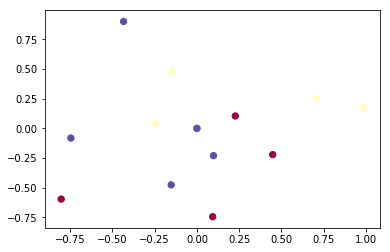

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

N = 5 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


print X.shape
print y.shape

In [163]:
def svm_loss(W, X, y, reg):
    dW = np.zeros(W.shape)
    dW = np.zeros(W.shape) # initialize the gradient as zero                                                 

    # compute the loss and the gradient                                                                      
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0

     
    for i in xrange(num_train):
        scores = X[i].dot(W)
        correct_class_score = scores[y[i]]
        for j in xrange(num_classes):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 5 # note delta = 1                                        
            #print
            #print "i={}, j={}, y[i]={}, loss={}, margin={}, loss+margin={}".format(
            #        i, j, y[i], loss - margin, margin, loss)
            #print scores[j], '-', correct_class_score, '=', margin - 5, '+ 10 =', margin
            if margin > 0:
                loss += margin

                # accumulate the gradient w.r.t the i-th example, j-th class                                       
               
                #print dW[:, j],'+', X[i], '=',
                dW[np.arange(W.shape[0]), j] += X[i]
                #print dW[np.arange(W.shape[0]), j]


                #print dW[:, y[i]], '-', X[i], '=',          
                dW[np.arange(W.shape[0]), y[i]] -= X[i]
                #print dW[np.arange(W.shape[0]), y[i]]
                
                print dW

    # Right now the loss is a sum over all training examples, but we want it                                 
    # to be an average instead so we divide by num_train.                                                    
    loss /= num_train

    # Add regularization to the loss.                                                                        
    loss += reg * np.sum(W * W)
    # Convert accumulated gradient to average                                                                
    dW /= num_train

    # add regulation gradient                                                                                
    dW += 2.0 * reg * W

    return loss, dW


#W = np.random.randn((N, D))
W = np.random.randn(D, K) * 10
print X
print y
print W
print W.shape
print X.shape
print y.shape
loss, dw = svm_loss(W, X, y, 0.0)
print loss
print dw

[[ 0.          0.        ]
 [ 0.22710769  0.10450883]
 [ 0.44835349 -0.22131234]
 [ 0.0933295  -0.74417041]
 [-0.8030315  -0.59593659]
 [-0.         -0.        ]
 [-0.24661832  0.04098052]
 [-0.14567402  0.47830856]
 [ 0.70596619  0.25320297]
 [ 0.98432195  0.17638113]
 [ 0.          0.        ]
 [ 0.09819421 -0.22990845]
 [-0.15240656 -0.47620609]
 [-0.74555634 -0.08152139]
 [-0.43389288  0.90096446]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[[ -4.4278311    1.17059439  23.31250626]
 [ -3.26434291   7.1328253    4.18740504]]
(2, 3)
(15, 2)
(15,)
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[-0.22710769  0.22710769  0.        ]
 [-0.10450883  0.10450883  0.        ]]
[[-0.45421539  0.22710769  0.22710769]
 [-0.20901765  0.10450883  0.10450883]]
[[-0.90256888  0.67546118  0.22710769]
 [ 0.01229469 -0.11680351  0.10450883]]
[[-1.35092236  0.67546118  0.67546118]
 [ 0.23360702 -0.11680351 -0.11680351]]
[[-1.44425187  0.67546118  0.76879069]
 [ 0.97777744 -0.11680351 -0.86097393]]

In [168]:
print X
print 
print y
print 
print dw

[[ 0.          0.        ]
 [ 0.22710769  0.10450883]
 [ 0.44835349 -0.22131234]
 [ 0.0933295  -0.74417041]
 [-0.8030315  -0.59593659]
 [-0.         -0.        ]
 [-0.24661832  0.04098052]
 [-0.14567402  0.47830856]
 [ 0.70596619  0.25320297]
 [ 0.98432195  0.17638113]
 [ 0.          0.        ]
 [ 0.09819421 -0.22990845]
 [-0.15240656 -0.47620609]
 [-0.74555634 -0.08152139]
 [-0.43389288  0.90096446]]

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]

[[-0.20468039 -0.11403481  0.3187152 ]
 [ 0.10735967 -0.09537712 -0.01198255]]


In [302]:
dw2 = dw.copy()
#print y == 1
#print dw
#print
#print dw[:, y]
#print
#print dw[:, y[y==1]]
#print
dw2 = np.zeros((dw.shape))
#print dw2
print
#print X
sc = X.dot(W)
mask_y = (np.arange(sc.shape[1]) == y.reshape((-1,1)))
mask_j = (np.arange(sc.shape[1]) != y.reshape((-1,1)))
#print mask_j
#print mask_y
print sc[(np.arange(sc.shape[1]) != y.reshape((-1,1)))]
print sc[mask_j].shape
print sc[mask_y].shape

margins = np.maximum(0, sc - sc[mask_y].reshape((-1,1)) + 1)
margins[mask_y] = 0
print sc
print sc[mask_y].reshape((-1,1))
print margins
margins[mask_y] = 0
print margins
print np.sum(margins)
print np.sum(margins, axis=0)
print np.sum(margins, axis=1)
#print np.sum(margins[mask_y])
#print np.sum(margins[mask_y], axis=0)
#print np.sum(margins[mask_y], axis=1)



[  0.           0.           1.0112942    5.73207035  -1.05374217
   9.52551905  -5.19878656  -0.94039829  -5.19073572 -21.21610467   0.           0.
   0.95820979  -5.57768912  -0.9163432   -1.39315484  -3.95244035
  17.51810452  -4.93417983  23.6855908    0.           0.           0.31571266
  -1.52495125   2.22933047  -3.57510112   3.56731135  -1.45422194
  -1.01985255   5.91850955]
(30,)
(15,)
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -1.34674716e+00   1.01129420e+00   5.73207035e+00]
 [ -1.26279415e+00  -1.05374217e+00   9.52551905e+00]
 [  2.01598013e+00  -5.19878656e+00  -9.40398288e-01]
 [  5.50102920e+00  -5.19073572e+00  -2.12161047e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  9.58209795e-01   3.61688961e-03  -5.57768912e+00]
 [ -9.16343200e-01   3.24116622e+00  -1.39315484e+00]
 [ -3.95244035e+00   2.63245261e+00   1.75181045e+01]
 [ -4.93417983e+00   2.41033755e+00   2.36855908e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  

In [305]:
dmargins = margins
print margins
dmargins -= 1

dmargins += sc[mask_y].reshape(-1,1)
dmargins[mask_y] = 0.0

#print X
print X.T
print (dmargins > 0).astype(int)

dw0 = X.T.dot((dmargins > 0).astype(int))
print
print dw0

dw0
#print margins
#for i,row in enumerate(margins):
#    for j in dw2.shape[1]:
       # dw2[[0, 1], j] += X[i]
#    pass
    #y[i]
    
    #dw2[y[i]] -= X[i]
        
dw2[:, :] = 0.0

#dw2[] = marginnp.sum(X, axis=0)

#[0,1,0]] = - [x0, x1] 

#print dw2
#print y
dwmask_j = (np.arange(dw2.shape[1]) != np.arange(dw2.shape[0]).reshape((-1,1)))# != y.reshape((-1,1)))
dwmask_y = (np.arange(dw2.shape[1]) == np.arange(dw2.shape[0]).reshape((-1,1)))# != y.reshape((-1,1)))

#print dwmask_j
#print dwmask_y
#print dw2[dwmask_j]
#print dw2[dwmask_y] 

#print dmargins[mask_j]

#dw2[dwmask_j] = np.sum(dmargins[mask_j].reshape((-1,2)), axis=0).reshape((-1,))
#dw2[dwmask_y] = - np.sum(np.sum(dmargins[mask_j].reshape((-1,2)), axis=0))
#print dw2


[[  0.          -1.          -1.        ]
 [  0.          -1.33545296   3.38532319]
 [  0.          -3.31653632   7.2627249 ]
 [  0.           2.03196026   2.03196026]
 [  0.           9.00205841   9.00205841]
 [ -1.           0.          -1.        ]
 [ -0.03817332   0.          -1.99276622]
 [  4.48233243   0.           4.48233243]
 [  3.26490522   0.          19.15055713]
 [  2.8206751    0.          25.09592835]
 [ -1.          -1.           0.        ]
 [  0.65286661   0.65286661   0.        ]
 [ -4.31771612 -10.1221477    0.        ]
 [-15.15483868 -20.17637197   0.        ]
 [ -8.36227999  -1.42391789   0.        ]]
[[ 0.          0.22710769  0.44835349  0.0933295  -0.8030315  -0.
  -0.24661832 -0.14567402  0.70596619  0.98432195  0.          0.09819421
  -0.15240656 -0.74555634 -0.43389288]
 [ 0.          0.10450883 -0.22131234 -0.74417041 -0.59593659 -0.
   0.04098052  0.47830856  0.25320297  0.17638113  0.         -0.22990845
  -0.47620609 -0.08152139  0.90096446]]
[[0 0 0]
 

In [205]:
print (np.indices(sc.shape)[1] == y.reshape(-1,1))
print (np.arange(sc.shape[0]) == y).reshape(-1,1)
print (np.arange(sc.shape[1]) == y.reshape(-1,1))

[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]]
[[ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]]


## Python Tutorial

In [2]:
# http://cs231n.github.io/python-numpy-tutorial/

In [27]:
### strings 
h = "hello"
w = "world"
print h.capitalize(), h.upper(), h.title()
print h.ljust(10), w.center(10), w.rjust(10)
print h.center(10), w.center(10), w.center(10)
print h.rjust(10), w.center(10), w.ljust(10)


Hello HELLO Hello
hello        world         world
  hello      world      world   
     hello   world    world     


In [28]:
### sets
animals = {'cat', 'dog'}
animals2 = {'fish', 'zebra'}
print type(animals), animals
animals.add('fish')
print animals
print animals.difference(animals2)
print animals.intersection(animals2)
print animals.union(animals2)

print {_ for _ in range(10)}
print {_%2 for _ in range(10)}

<type 'set'> set(['dog', 'cat'])
set(['fish', 'dog', 'cat'])
set(['dog', 'cat'])
set(['fish'])
set(['zebra', 'fish', 'dog', 'cat'])
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
set([0, 1])


## Numpy Tutorial

In [29]:
import numpy as np

### Arrays

In [40]:
a = np.array([1, 2, 3])
b = np.asarray([[1, 2, 3], [4, 5, 6]])
print type(a), a.shape
print a
print type(b), b.shape
print b

print a[0], a[1], a[2]
print b[0], b[1]
print b[0, 0], b[0, 1]
print b[[0, 1], [0, 0]], b[0, [0, 2]]

<type 'numpy.ndarray'> (3,)
[1 2 3]
<type 'numpy.ndarray'> (2, 3)
[[1 2 3]
 [4 5 6]]
1 2 3
[1 2 3] [4 5 6]
1 2
[1 4] [1 3]


In [45]:
a = np.zeros((2,2))
b = np.ones((2,2))
c = np.full((2,2), 7.1)
c2 = np.ones((2,2)) * 7.2
d = np.eye(2)
e = np.random.random((2, 2))
print a
print b
print c
print c2
print d
print e

[[ 0.  0.]
 [ 0.  0.]]
[[ 1.  1.]
 [ 1.  1.]]
[[ 7.1  7.1]
 [ 7.1  7.1]]
[[ 7.2  7.2]
 [ 7.2  7.2]]
[[ 1.  0.]
 [ 0.  1.]]
[[ 0.55552209  0.81459685]
 [ 0.75149786  0.43008221]]


### Array Indexing

In [177]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print a.shape
print a[0, 1]

b = a[:2, 1:3]
print b.shape
b[0, 0] = 77
print a[0, 1]

(3, 4)
2
(2, 2)
77


In [225]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a = np.array([a, a + 20]).reshape((6, 4))
print a

b = np.array(np.array_split(a, 3))
inds = np.arange(b.shape[0])
print b[inds != 1].reshape((4, -1))



[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]]
[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [21 22 23 24]]

 [[25 26 27 28]
  [29 30 31 32]]]

[0 1 2]
[False  True False]

[ True False  True]


[[[ 9 10 11 12]
  [21 22 23 24]]]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [25 26 27 28]
 [29 30 31 32]]


In [62]:
def update(x=None, a = None, c=0):
    try:
        _ = x
        _[0] = np.full(_[0].shape, c)
    except:
        _ = a
        _[0] = np.full(_[0].shape, c)
    return _
    
    
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print a

b = update(x = a, c = 2)
print
print a
print b

b2 = update(a = a, c = 3)
print
print a
print b
print b2


row_rank1 = a[1, :]
row_rank2 = a[1:2, :]
print row_rank1.shape, row_rank1
print row_rank2.shape, row_rank2

row_rank1[:] = row_rank1[[2,3,1,0]]
print
print row_rank1.shape, row_rank1
print row_rank2.shape, row_rank2


col_rank1 = a[:, 1]
col_rank2 = a[:, 1:2]
print
print col_rank1.shape
print col_rank1
print col_rank2.shape
print col_rank2

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

[[ 2  2  2  2]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 2  2  2  2]
 [ 5  6  7  8]
 [ 9 10 11 12]]

[[ 3  3  3  3]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 3  3  3  3]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 3  3  3  3]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(4,) [5 6 7 8]
(1, 4) [[5 6 7 8]]

(4,) [7 8 6 5]
(1, 4) [[7 8 6 5]]

(3,)
[ 3  8 10]
(3, 1)
[[ 3]
 [ 8]
 [10]]


In [67]:
a = np.array([[1,2], [3, 4], [5, 6]])

print a[[0,1,2], [0,1,0]]
print np.array([a[0,0], a[1,1], a[2,0]])

print a[[0,0], [1,1]]
print [a[0,1], a[0,1]]
print np.array([a[0, 1], a[0,1]])
print np.asarray([a[0,1], a[0,1]])

[1 4 5]
[1 4 5]
[2 2]
[2, 2]
[2 2]
[2 2]


In [80]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print a

inds0 = np.arange(3)
inds1 = np.array([1, 2, 1])
print
print inds0
print inds1

print
print a[inds0, inds1]
print
print a[inds1, inds0]
print
print a[range(3), inds1]

a[inds0, inds1] *= 100
print a

a[inds1, inds0] *= 100
print a

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[0 1 2]
[1 2 1]

[2 6 8]

[4 8 6]

[2 6 8]
[[  1 200   3]
 [  4   5 600]
 [  7 800   9]
 [ 10  11  12]]
[[    1   200     3]
 [  400     5 60000]
 [    7 80000     9]
 [   10    11    12]]


In [104]:
a = np.array([[1,2], [3, 4], [5, 6]])
print a
print
print a >= 2
print (a >= 2)

bool_idx = (a >= 2)
print
print bool_idx 
print
print a[bool_idx]
print a[a >= 2]


print
print 'all'

bool_idx = (a >= 2).all(axis=0)
print
print bool_idx 
print
print a[:, bool_idx]


bool_idx = (a >= 2).all(axis=1)
print
print bool_idx 
print
print a[bool_idx]

print
print 'any'


bool_idx = (a >= 2).any(axis=0)
print
print bool_idx 
print
print a[:, bool_idx]


bool_idx = (a >= 2).all(axis=1)
print
print bool_idx 
print
print a[bool_idx]


[[1 2]
 [3 4]
 [5 6]]

[[False  True]
 [ True  True]
 [ True  True]]
[[False  True]
 [ True  True]
 [ True  True]]

[[False  True]
 [ True  True]
 [ True  True]]

[2 3 4 5 6]
[2 3 4 5 6]

all

[False  True]

[[2]
 [4]
 [6]]

[False  True  True]

[[3 4]
 [5 6]]

any

[ True  True]

[[1 2]
 [3 4]
 [5 6]]

[False  True  True]

[[3 4]
 [5 6]]


In [89]:
x = np.array([1,2], dtype=np.float32)
print x
print x.dtype
x = np.array([1.2,2.9], dtype=np.int64)
print x
print x.dtype

[ 1.  2.]
float32
[1 2]
int64


In [93]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print x
print y

print
print x + y
print np.add(x, y)

print
print x - y
print np.subtract(x, y)

print
print x * y
print np.multiply(x, y)

print
print x / y
print np.divide(x, y)

print
print np.sqrt(x)

[[ 1.  2.]
 [ 3.  4.]]
[[ 5.  6.]
 [ 7.  8.]]

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


In [97]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

print
print x
print y
print 
print v
print w

print
print v.dot(w)
print np.dot(v, w)
print
print x.dot(y)
print np.dot(x, y)

print
print x.dot(y)
print x.dot(y.T)
print x.T.dot(y)
print x.T.dot(y.T)



print 
print v.dot(x)
print x.dot(v)


[[1 2]
 [3 4]]
[[5 6]
 [7 8]]

[ 9 10]
[11 12]

219
219

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]

[[19 22]
 [43 50]]
[[17 23]
 [39 53]]
[[26 30]
 [38 44]]
[[23 31]
 [34 46]]

[39 58]
[29 67]


In [106]:
x = np.array([[1,2],[3,4]])

print x
print
print np.sum(x)
print np.sum(x, axis=0)
print np.sum(x, axis=0, keepdims=True)
print np.sum(x, axis=1)
print np.sum(x, axis=1, keepdims=True)

[[1 2]
 [3 4]]

10
[4 6]
[[4 6]]
[3 7]
[[3]
 [7]]


### Broadcasting

In [108]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)

print x
print y
print v

for i in range(4):
    y[i, :] = x[i, :] + v

print
print x
print y

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[1 0 1]

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [110]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))
print x
print v
print vv

y = x + vv
print y

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[1 0 1]
[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [116]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v
print y

v = np.array([v])
print v
y = x + v
print y


[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
[[1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [128]:
v = np.array([1,2,3])
w = np.array([4,5])
print v
print w

print
print v.reshape((3,1))
print v.reshape((3,1)) * w
print w* v.reshape((3,1))
print
print w.reshape((2,1))
print v * w.reshape((2,1))
print w.reshape((2,1)) * v


x = np.array([[1,2,3], [4,5,6]])
print
print x + v

print x.T
print w
print (x.T + w)
print (x.T + w).T

print
print w.reshape((2,1))
print x + w.reshape((2,1))
print
print x * 2

[1 2 3]
[4 5]

[[1]
 [2]
 [3]]
[[ 4  5]
 [ 8 10]
 [12 15]]
[[ 4  5]
 [ 8 10]
 [12 15]]

[[4]
 [5]]
[[ 4  8 12]
 [ 5 10 15]]
[[ 4  8 12]
 [ 5 10 15]]

[[2 4 6]
 [5 7 9]]
[[1 4]
 [2 5]
 [3 6]]
[4 5]
[[ 5  9]
 [ 6 10]
 [ 7 11]]
[[ 5  6  7]
 [ 9 10 11]]

[[4]
 [5]]
[[ 5  6  7]
 [ 9 10 11]]

[[ 2  4  6]
 [ 8 10 12]]


## Scipy Tutorial

In [144]:
import io
import requests
def urlbytes(url):
    resp = requests.get(url)
    return io.BytesIO(resp.content)
    
import matplotlib.pyplot as plt
%matplotlib inline
def showimg(img, **kwargs):
    ax = plt.imshow(img, **kwargs)
    plt.show()
    return ax

uint8 (400, 248, 3)


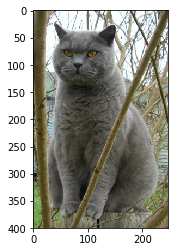

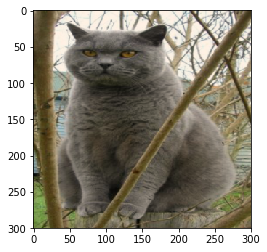

In [147]:
from scipy.misc import imread, imsave, imresize
from PIL import Image

cat = urlbytes('http://cs231n.github.io/assets/cat.jpg')
img = imread(cat)
print img.dtype, img.shape

img_tinted = img * [1, 0.95, 0.9]
img_tinted = imresize(img_tinted, (300,300))

ax = showimg(img)
ax = showimg(img_tinted)


In [176]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

x = np.array([[0, 1], [1, 0], [2, 0]])
print x


d = pdist(x, 'euclidean')
print
print d

d = squareform(pdist(x, 'euclidean'))
print
print d

print
x2 = np.sum(x**2, axis=1, keepdims=True)
xx = x.dot(x.T)
print x2
print xx
print x2 - 2*xx + x2
print
x2 = np.array([[__ for __ in _] for _ in x])


[[0 1]
 [1 0]
 [2 0]]

[ 1.41421356  2.23606798  1.        ]

[[ 0.          1.41421356  2.23606798]
 [ 1.41421356  0.          1.        ]
 [ 2.23606798  1.          0.        ]]

[[1]
 [1]
 [4]]
[[1 0 0]
 [0 1 2]
 [0 2 4]]
[[ 0  2  2]
 [ 2  0 -2]
 [ 8  4  0]]



# Linear Classification

### Overview
Two major components:
- score function
    - maps raw data to class scores
   
- loss function
    - quantifies the agreement b/w predicted scores and labels
 
The problem can be cast as an optimization problem:
- minimize the loss function w.r.t the parameters of the score function

### Parameterized mapping from images to label scores
Define the score function that maps pixel values of an image to confidence scores for eacch class.


### Multiclass SVMs
L_i = sum(max(0, s[j] = s[y_i] + delta))

#lets assume scores:
s = [13, -7, 11] # s[0] = true class, 
y_i = 0

#sum over all incorrect classes j != y_i (s[0] - s[y_i] = 0
L_i = max(0, -7-s[y_i] + 10) + max(0, 11-s[y_i] + 10
    = max(0, _) + max(0, -2 + 10)
    = 0 + 8
#we get zero loss for any pair <0 because correct class score is greater than the incorrect class score by at least a margin of delta (10)

#the SVM loss function wants the score of the correct class to be larger than the incorrect class scores by at least a margin of delta, 
otherwise, we accumulate loss

#working with linear loss functions, we can write
L_i = sum(max(0, w.T[j].dot(x[i]) - w.T[y_i].dot(x[i]) + delta)

#threshold is at zero.. often called hinge loss




In [54]:
import numpy as np
def L_i(x, y, W):
    """ loss function without regularization
    
    :x = column vector (e.g. 3073 x 1)
    :y = integer giving index of correct class
    :W = weight matrix (e.g. 10 x 3073)
    """
    delta = 1.0
    scores = W.dot(x)
    score_true = scores[y]
    D = W.shape[0]
    loss_i = 0.0
    for j in xrange(D):
        if y == j:
            continue            
        loss_i += max(0, scores[j] - score_true + delta)
    return loss_i


def L_i_vectorized(x, y, W):
    """ loss function without regularization
    
    :x = column vector (e.g. 3073 x 1)
    :y = integer giving index of correct class
    :W = weight matrix (e.g. 10 x 3073)
    """
    delta = 1.0
    scores = W.dot(x)
    
    margins = np.maximum(0, scores - scores[y] + delta)
    margins[y] = 0
    loss_i = np.sum(margins)
    
def L(X, y, W):
    """ 
    fully vectorized.. eval loss over all examples in X    

    x = [[1].... 50,000]    1
          ...
         [[1]...   50,000]]  3073
    y = [1...50,000]
    W = [[1...3073]  1
         ... 
         [1...3073]] 10
    """
    delta = 10.0
    scores = W.dot(X)
    margins = np.maximum(0, scores - scores[y, :] + delta)
    margins[:, y, 0] = 0.0 #np.zeros_like(y)
    loss = np.sum(np.sum(margins, axis=1))
    return loss

    
    
X = np.random.randint(0-255/2,255/2, size=(3073, 3)).astype(float)
y = np.array([[1], [4], [3]])#np.random.randint(0, 3, size=(3,1))
#X[:, :] *= y.reshape((1, 3)).astype(float) *.1
W = np.random.random((5, 3073))
print X.shape, y.shape, W.shape
print X[:5, :]
print y[:]
print W[:5, :]
l= L(X,y,W)
print l



(3073, 3) (3, 1) (5, 3073)
[[ -48.   31.  -75.]
 [ -96. -117.   32.]
 [ -23.  -94.   -5.]
 [ -53.   32.  -23.]
 [  32.  -80.  125.]]
[[1]
 [4]
 [3]]
[[ 0.1669584   0.47825303  0.19011718 ...,  0.61719785  0.70255026
   0.22207288]
 [ 0.01175936  0.99778189  0.7322487  ...,  0.01216036  0.11978798
   0.19744082]
 [ 0.12586567  0.59769795  0.23507197 ...,  0.82607812  0.61327901
   0.25211055]
 [ 0.95274496  0.30065255  0.23725402 ...,  0.69816264  0.55752307
   0.97441648]
 [ 0.72423955  0.89850426  0.08266282 ...,  0.01825383  0.20745876
   0.36876737]]
11750.7288462


# Softmax

P(y_i) = e**f[y_i] / sum(e**f[j])

In [52]:
import numpy as np
f = np.array([123, 456, 789]) # 3 classes with large scors
p = np.exp(f) / np.sum(np.exp(f)) # numerical blowup
print f
print p

# instead, first shift values of f so highest number is 0
f -= np.max(f)
p = np.exp(f) / np.sum(np.exp(f))
print
print f
print p

[123 456 789]
[  0.   0.  nan]

[-666 -333    0]
[  5.75274406e-290   2.39848787e-145   1.00000000e+000]


/home/calebgeniesse/src/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/calebgeniesse/src/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


# Optimization 1
## Gradients

- score functions: map raw pixels to class scores
- loss functions: measure quality of particular params of score fxn

- recall the linear function had form
       - f(x[i], W) = Wx[i]

- SVM formulated as
    - L = 1/N sum(sum(max(0, f[j] - f[y] + 1)) + aR(W)
    
    
- Optimization is the process of finding the params minimizing the loss


In [97]:
def L(X, y, W):
    """ 
    fully vectorized.. eval loss over all examples in X    

    x = [[1].... 50,000]    1
          ...
         [[1]...   50,000]]  3073
    y = [1...50,000]
    W = [[1...3073]  1
         ... 
         [1...3073]] 10
    """
    delta = 10.0
    scores = W.dot(X)
    margins = np.maximum(0, scores - scores[y] + delta)
    margins[y] = 0.0 #np.zeros_like(y)
    loss = np.sum(np.sum(margins, axis=1))
    return loss


In [98]:
### Strategy #1: Random search (bad idea)

X = np.random.randint(0-255/2,255/2, size=(3073, 5)).astype(float)
y  = np.random.randint(0, 10, size=(5,1))
W = np.random.random((10, 3073))


bestloss = float('inf')
Wbest = None
for num in xrange(100):
    W = np.random.randn(10, 3073) * 0.0001
    loss = L(X, y, W)
    if loss < bestloss:
        bestloss = loss
        Wbest = W
        print "in attempt {} the loss was {}, best {}".format(num, loss,bestloss)
    


IndexError: index 6 is out of bounds for axis 0 with size 5

In [67]:
scores = Wbest.dot(X)
print scores
y_pred = np.argmax(scores, axis=0)
print y_pred
print y
print np.mean(y_pred == y)


[[  5.92379723e-02   7.20315175e-02  -2.59033280e-01   6.29125380e-01
   -2.82233663e-01]
 [  7.08588210e-02   1.94460345e-02  -1.25360159e-01  -6.29123689e-01
    7.58940104e-03]
 [  2.94958497e-02   3.87558034e-01   5.12267162e-01   8.84324210e-02
    8.12369110e-02]
 [ -1.30553036e+00   4.20066278e-01  -5.55555735e-01   6.57171890e-02
   -5.58267882e-01]
 [  6.86648120e-01   8.56648086e-03   3.61604672e-01  -8.04298368e-03
    1.28556966e-01]
 [ -1.58898622e-01  -5.13831095e-01  -1.28108998e-01  -4.65439568e-01
    1.07140388e-03]
 [  5.09375642e-01   3.57203046e-01   1.17921617e-01  -1.23110653e-01
    2.05502138e-01]
 [  6.07852453e-02   5.40293211e-01   7.14637748e-01   4.42142719e-01
   -8.94706879e-02]
 [ -8.70802549e-01  -7.56283864e-02   1.27170713e-01   7.06990983e-02
    4.78896435e-01]
 [ -2.72763048e-01   4.48245058e-01  -3.60457690e-01   4.46600384e-01
   -8.70557355e-02]]
[4 7 7 0 8]
[[4]
 [0]
 [2]
 [9]
 [7]]
0.16


In [81]:
### strat 2: Random local search
W = np.random.randn(10, 3073) * 0.001 # generate random starting W
bestloss = float("inf")
for i in xrange(1000):
    step_size = 0.0001
    Wtry = W + np.random.randn(*W.shape) * step_size
    loss = L(X, y, Wtry)
    if loss < bestloss:
            W = Wtry
            print "iter {} loss is {}, best = {}".format(i, loss, bestloss)
            bestloss = loss
    print '.',

iter 0 loss is 2660.26900546, best = inf
. iter 1 loss is 2641.42401486, best = 2660.26900546
. iter 2 loss is 2627.04748528, best = 2641.42401486
. iter 3 loss is 2616.23733471, best = 2627.04748528
. iter 4 loss is 2611.65570892, best = 2616.23733471
. iter 5 loss is 2604.3705902, best = 2611.65570892
. . iter 7 loss is 2580.47600393, best = 2604.3705902
. iter 8 loss is 2571.08800698, best = 2580.47600393
. . . . iter 12 loss is 2561.95719192, best = 2571.08800698
. . . . . . . iter 19 loss is 2547.05276539, best = 2561.95719192
. . . . . . iter 25 loss is 2526.72740111, best = 2547.05276539
. iter 26 loss is 2501.6158197, best = 2526.72740111
. iter 27 loss is 2487.56780057, best = 2501.6158197
. . iter 29 loss is 2455.44424926, best = 2487.56780057
. iter 30 loss is 2451.2602516, best = 2455.44424926
. iter 31 loss is 2416.12544187, best = 2451.2602516
. . . . . . iter 37 loss is 2415.94167944, best = 2416.12544187
. iter 38 loss is 2388.17152503, best = 2415.94167944
. . iter 40 

In [84]:
### strat 3: following a gradient
# df(x)/dx = lim_h-->0 (f(x+h) - f(x)) /h
# numerical vs. analytical

# numerical gradient w/ finite differences

def eval_numerical_gradient(f, x):
    # eval f at x
    fx = f(x) 
    grad = np.zeros(x.shape)
    h = 0.00001
    
    itr = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not itr.finished:
        
        # eval at x + h
        ix = itr.multi_index
        x_old = x[ix]
        x[ix] = x_old + h
        fxh = f(x) # at x + h
        x[ix] = x_old
        
        # compute partial (i.e. the slope)
        grad[ix] = (fxh - fx) / h
        itr.iternext()
        
    return grad

def CIFAR10_loss_fun(W):
    return L(X, y, W)

W = np.random.rand(10, 3073)
df = eval_numerical_gradient(CIFAR10_loss_fun, W)

loss_original = CIFAR10_loss_fun(W) # the original loss
print 'original loss: %f' % (loss_original, )


for step_size_log in reversed(range(1,11)*-1):
    step_size = 10 ** step_size_log
    W_new = W - step_size * df
    loss_new = CIFAR10_loss_fun(W_new)
    print 'for step size %f new loss: %f' % (step_size, loss_new)

original loss: 142911.154654


## Gradient Descent

Now that we can compute gradient of the loss function, the procedure of repeatedly evaluating gradient and performing param update

In [ ]:
# vanilla grad descent
while True:
    weights_grad = evaluate_gradient(loss_fun, data, weights)
    weights += -step_size * weights_grad
    
# vanilla minibatch
while True:
    data_batch = sample_training_data(data, 256)
    #...
    
    
# Stochastic Gradient descent (on-line) 

# Optimization - 2
## Backprop

- a way of computing gradients of expressions through recursive application of the chain rule

### chain rule

In [85]:
# f(x,y,z) = (x + y)z
x = -2 
y = 5
z = -4

# forward pass
q = x + y
f = q * z

# baqward pass (in reverse order)
dfdz = q # df/dz = q
dfdq = z # df/dq = z

dfdx = 1.0 * dfdq # df/dx = 1
dfdy = 1.0 * dfdq # df/dy = 1




In [88]:
# sigmoid example

def sigmoid(w, x):
    def f1(_):
        return 1. / _
    def translate(_, c = 1.):
        return 1. + _
    def f3(_):
        return np.exp(_)
    def scale(_, a):
        return a.dot(_)
    
    #return 1. / (1. + np.exp(-(w.dot(x))))
    return f1(translate(f3(scale(w, x))))
    
              
              
w = [2,-3,-3] # assume some random weights and data
x = [-1, -2]     

# forward
dot = w[0]*x[0] + w[1]*x[1] + w[2]
f = 1. / (1. + np.exp(-dot))

#backward 
ddot = (1 - f) * f
dx = [w[0] * ddot, w[1] * ddot]
dw = [x[0] * ddot, x[1] * ddot, 1.0 * ddot]

print w
print x
print
print dot
print f
print 
print ddot
print dx
print dw

[2, -3, -3]
[-1, -2]

1
0.73105857863

0.196611933241
[0.3932238664829637, -0.58983579972444555]
[-0.19661193324148185, -0.3932238664829637, 0.19661193324148185]


In [90]:
### gradients for vectorized ops

# forward pass
W = np.random.randn(5, 10)
X = np.random.randn(10, 3)
D = W.dot(X)
print W
print X

#print
#print D
#print


# now suppose we had the gradient on D from above in the circuit
dD = np.random.randn(*D.shape) # same shape as D
dW = dD.dot(X.T) #.T gives the transpose of the matrix
dX = W.T.dot(dD)



[[-0.2572907  -0.46314989 -0.42467226 -0.65664211 -0.22707689  0.76449691
  -0.37099763  1.92398599 -1.63775174 -0.7682263 ]
 [-0.94439368 -0.79186507  0.65888774  1.77983426  0.1641009   1.05126854
  -0.90400879 -1.7548213  -0.05396906  0.35187036]
 [ 0.35222938 -1.02778609  0.5829509  -0.09541482 -0.53098826 -0.86712735
   0.58447808  0.03270507 -0.51726769  0.90713454]
 [ 0.28381985  0.74556302  0.88615648 -0.28664022 -0.83993315  1.59475459
   2.30367921 -0.04859741  0.50415448 -0.97316428]
 [-0.02281009 -0.41628561 -0.69283091 -0.37702596 -0.74587038 -0.07946188
  -0.8332004   0.41819863  1.75697263  0.62177862]]
[[ 0.45918898 -0.60914248 -0.04838985]
 [-0.47496011 -1.41076471 -1.02028988]
 [ 0.42509001  1.3658174   1.45032468]
 [ 0.13613069  0.42661088 -2.62142314]
 [ 1.37544665  0.8222548   2.17939869]
 [-0.76996236 -1.05102935  0.06084091]
 [-1.16645618 -0.26147845  2.02038969]
 [-2.01124522  0.32117862  0.13817652]
 [-0.19335731  1.42266673 -0.46088326]
 [-0.83692167  0.027939

# Neural Nets
## Intro


In [ ]:
s = W.dot(x)
# nn
s = W2.dot(max(0, W1.dot(x)))

# 3 layer
s = W3.dot(max(0, W2.dot(max(0, W1.dot(x)))))

# n layer .... worng..
layers = [x, W1, W2, W3]
for Layer in layers[1:]:
    layers.append(
        Layer.dot(max(0, layers[-1]))
    )


In [ ]:
# forward-prop neuron
class Neuron(object):
    def forward(inputs):
        """ 1-D numpy array"""
        cell_body_sum = np.sum(inputs * self.weights) + self.bias
        firing rate = 1. / 1. + np.exp(-cell_body_sum)
        return firing_rate

In [ ]:
### Single neuron as linear classifier
# activation near 1 == like, 0 == 'dislike'

# Binary Softmax classifier
# ..




In [ ]:
# forward pass of a 3-layer nn
f = lambda x: 1.0 / (1.0 + np.exp(-x))
x = np.random.randn(3, 1)
h1 = f(W1.dot(x) + b1)
h2 = f(W2.dot(h1) + b2)
out = W3.dot(h2) + 3

# each input example would be a column of x
# x = [[ex1 feature 1], [ex2 feature 1], ... batch_size
#       [ex1 feature 2], [ex2 feature 2], ...           ]



# Data Processing

In [ ]:
# Mean subtraction
X -= np.mean(X, axis=0)

# Normalization 
X /= np.std(X, axis=0) 

# note: normalize min,max to -1, 1 if features 
#       importance not related to scale.
#       i.e. pixels 0 to 255 are approximately equally important

# PCA and Whitening
X -= np.mean(X, axis=0)
cov = np.dot(X.T, X) / X.shape[0] # get data covariance matrix

# U are eigenvectors, S is 1-d array of singular values
U,S,V = np.linalg.svd(cov)

# decorrelate the data (project into eigenbasis)
Xrot = np.dot(X, U)

# PCA
Xrot_reduced = np.dot(X, U[:, :n_components])

# whitening (divides in every dimension by the eigenvalue to normalize scale)
Xwhite = Xrot / np.sqrt(S + 1e-5)


### PITFALLS
# compute stats on train only... after splitting, then apply to test/val
                        